# Исследование объявлений о продаже квартир

Нужно изучить данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**План работы:**

1) Изучение датасета и определение инструментов для дальнейшей работы. Загрузка датасета, импорт бибилиотек, переименование столбцов, первый взгляд на пропуски.

2) Предобработка данных. Анализ и заполнение пропусков, работа с дубликатами и аномальными значениями.

3) Рассчет и добавление новых данных, основываясь на имеющихся данных и поставленной задаче.

4) Исследовательский анализ данных. Разбиваем задачу на этапы, изучаем данные и их взаимосвязь. 

5) Общий вывод. Подводим итоги исследования.

## Импортируем данные и изучаем общую информацию. 

Импортируем библиотеки. Указываем в качестве разделителя знак табуляции \t. Выводим первые 5 строк, общую информацию о датафрейме и гистограммы для числовых значений.

Переименуем столбцы cityCenters_nearest, parks_around3000 и ponds_around3000

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'city_centers_nearest'}>],
       [<Axes: title={'center': 'parks_around_3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around_3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

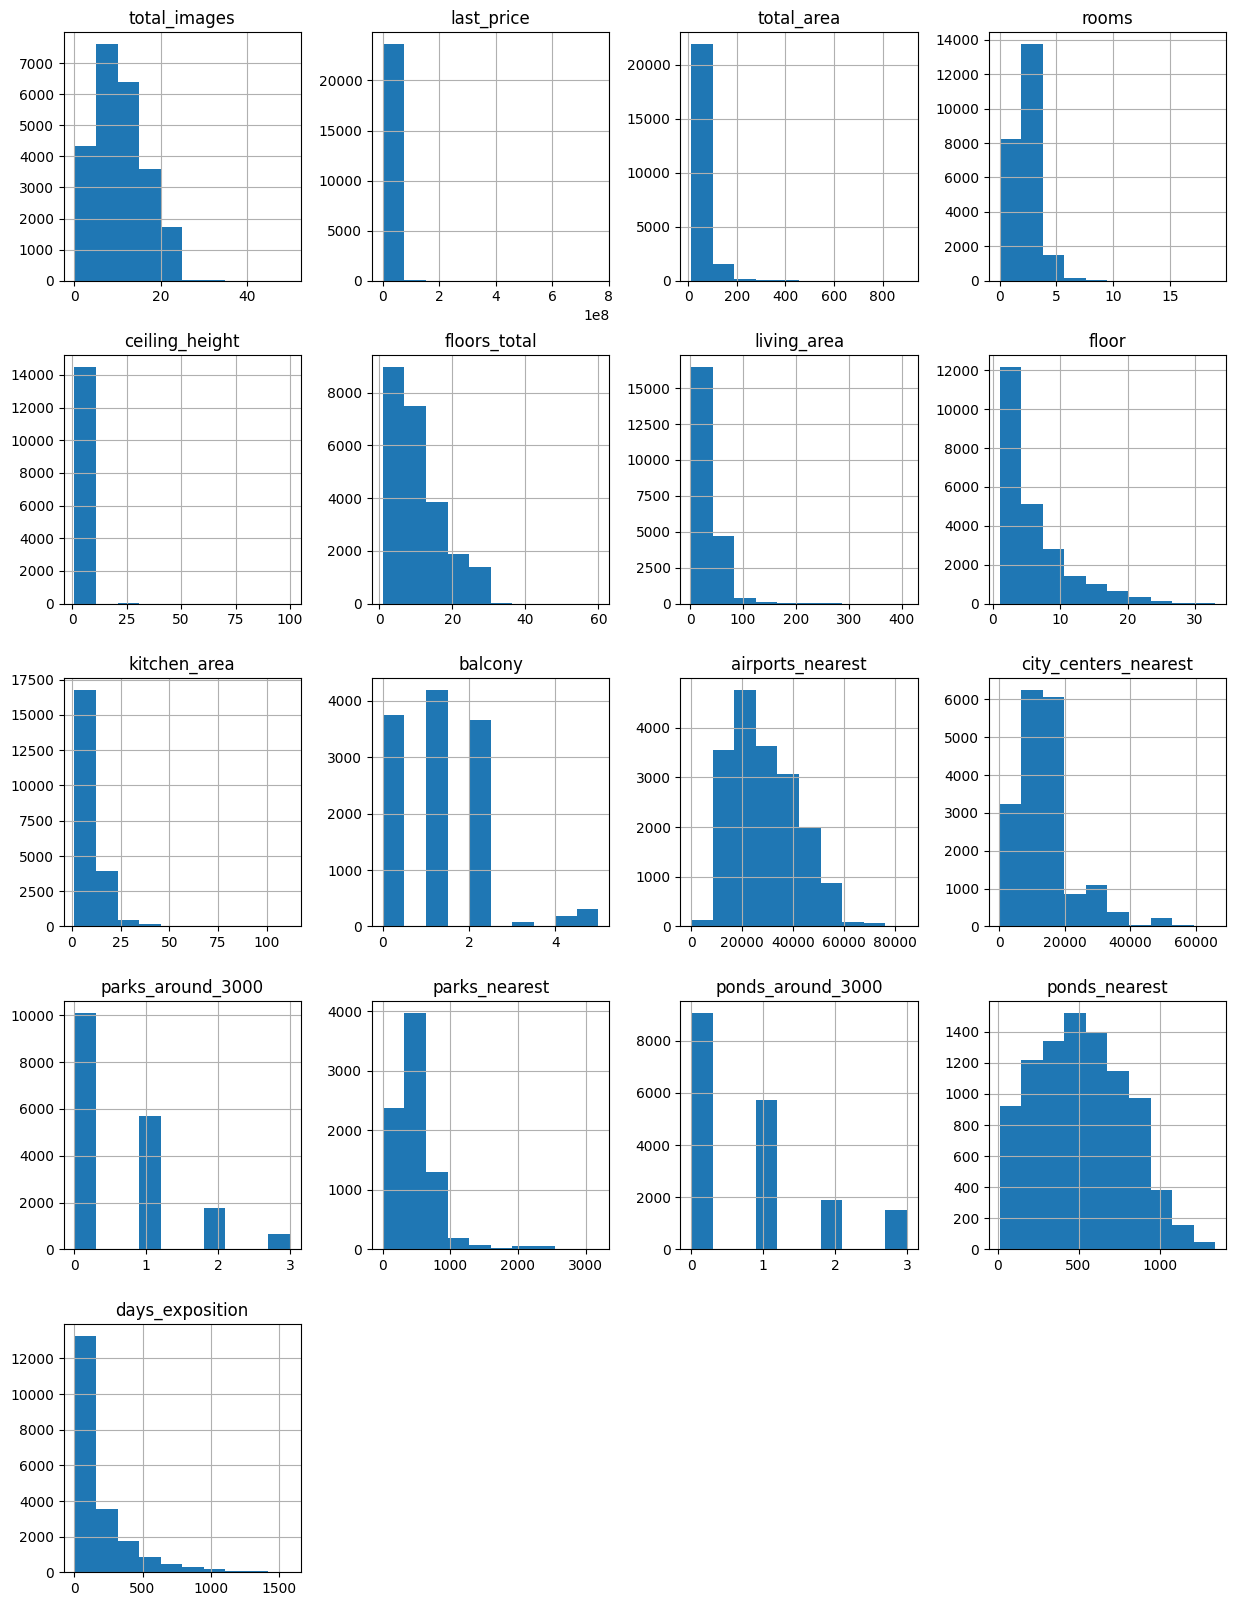

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import scipy.stats as stats

df = pd.read_csv('real_estate_data.csv', sep='\t')
df.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'},inplace = True)
display(df.head())
df.info()
df.hist(figsize=(15, 20))

## Предобработка данных

### Проанализируем столбцы с пропусками.

In [72]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Оставляем пропуски в следующих столбцах:
- ceiling_height - высота потолков;
- floors_total - всего этажей в доме;
- kitchen_area - площадь кухни;
- days_exposition - сколько дней было размещено объявление;

Картографические пропуски нам так же нечем заполнить, оставляем и их, чтобы не допустить всплесков нулевых значений:

- parks_around_3000 - число парков в радиусе 3км;
- ponds_around_3000 - число водоемов в радиусе 3км;
- parks_nearest - расстояние до ближайшего парка;
- ponds_nearest - расстояние до ближайшего водоема;

Заменяем:
- locality_name - название населенного пункта, заменяем на "Неизвестно";
- is_apartment - является ли апартаментами - можно предположить, что пропуск означает, что жилье не является апартаментами, заменяем на "0";
- balcony - число балконов - можно предположить, что пропуск означает, что балконов нет, заменяем на "0";
- living_area - жилая площадь - найдем соотношение медианной общей площади к медианной жилой. Затем, заполним пропуски в столбце отношением общей площади к найденному соотношению.

Расстояния до центра (city_centers_nearest) и до аэропорта (airports_nearest) мы сможем заполнить средним значением, сгруппировав данные по названию населенного пункта. Сделаем это после обработки столбца locality_name.

In [73]:
# Заполняем пропуски
df['is_apartment'] = df['is_apartment'].fillna(0)
df['balcony'] = df['balcony'].fillna(0)
df['locality_name'] = df['locality_name'].fillna('Неизвестно')

ml = df['total_area'].median() / df['living_area'].median()
df['living_area'] = df['total_area'] / ml

mk = df['total_area'].median() / df['kitchen_area'].median()
df['kitchen_area'] = df['total_area'] / mk

# Проверяем общие данные
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Видим, что везде, где есть пропуски в **living_area** так же отсутствует и площадь кухни **kitchen_area**. Эти пропуски придется оставить.

Пропуски в картографических данных могут быть обусловлены ошибками обработки при считывании. Пропуски в данных, добавленных пользователями - человеческим фактором.

### Изменение типов данных
- first_day_exposition - преобразовываем в datetime
- is_apartment - преобразовываем в bool
- balcony - число балконов всегда целое
- last_price - цена записана в виде целого числа

In [74]:
# Выполняем преобразования
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['balcony'] = pd.to_numeric(df['balcony'], downcast='integer')
df['last_price'] = pd.to_numeric(df['last_price'], downcast='integer')

df['total_area'] = pd.to_numeric(df['total_area'], downcast='float')
df['ceiling_height'] = pd.to_numeric(df['ceiling_height'], downcast='float')
df['floors_total'] = pd.to_numeric(df['floors_total'], downcast='float')
df['living_area'] = pd.to_numeric(df['living_area'], downcast='float')


### Работа с дубликатами

Проверим на наличие явных дубликатов.

In [75]:
df.duplicated().sum()

0

Проверим столбец locality_name.

In [76]:
print(df['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Произведем замены, оставив только названия населенных пунктов.

In [77]:
df['locality_name'] = df['locality_name'].str.replace('деревня ','')
df['locality_name'] = df['locality_name'].str.replace('село ','')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество ','')
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной станции ','')
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество ','')
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок ','')
df['locality_name'] = df['locality_name'].str.replace('коттеджный посёлок ','')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа ','')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа ','')
df['locality_name'] = df['locality_name'].str.replace('городской поселок ','')
df['locality_name'] = df['locality_name'].str.replace('городской посёлок ','')
df['locality_name'] = df['locality_name'].str.replace('посёлок ','')
df['locality_name'] = df['locality_name'].str.replace('поселок ','')
df['locality_name'] = df['locality_name'].str.replace('станции ','')

print(df['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодёжное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

Теперь мы можем сгруппировать данные по населенному пункту и заполнить часть пропусков в cityCenters_nearest и airports_nearest средними значениями для каждой группы. Оставшиеся пропуски оставим, вычислить для них эти значения не получится.

In [78]:
for t in df['locality_name'].unique():
    df.loc[(df['locality_name'] == t) & (df['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    df.loc[(df['locality_name'] == t), 'city_centers_nearest'].mean()
    df.loc[(df['locality_name'] == t) & (df['airports_nearest'].isna()), 'airports_nearest'] = \
    df.loc[(df['locality_name'] == t), 'airports_nearest'].mean()
    

### Работа с аномальными значениями.
Рассмотрим числовые значения в столбцах, отсортированных по убыванию, чтобы выявить аномально большие значения.

Начнём со столбца total_images

Все в порядке, в объявлении может быть 50 изображений.

In [79]:
display(df['total_images'].sort_values(ascending=False))

12667    50
9778     50
17396    50
15157    42
1058     39
         ..
15267     0
8140      0
4103      0
18237     0
16399     0
Name: total_images, Length: 23699, dtype: int64

Столбец с ценой last_price

In [80]:
display(df['last_price'].sort_values(ascending=False).tail(20))

12607    530000
22430    520000
2097     500000
14295    500000
4405     500000
14904    500000
6859     490000
10782    490000
16032    480000
18867    470000
23484    470000
21912    470000
5698     450000
17676    450000
9581     450000
16219    450000
16274    440000
17456    430000
14911    430000
8793      12190
Name: last_price, dtype: int32

Последнее значение резко выбивается, уберем эту строку. Так же видно, что присутствует много квартир с ценой меньше миллиона.

In [81]:
df = df.drop(index=8793)

Далее площадь total_area

Все в порядке, квартиры разные бывают, особенно в столице.

In [82]:
display(df['total_area'].sort_values(ascending=False))

19540    900.000000
12859    631.200012
3117     631.000000
15651    618.000000
5358     590.000000
            ...    
19558     13.200000
17961     13.000000
19546     13.000000
19807     13.000000
19904     12.000000
Name: total_area, Length: 23698, dtype: float32

Количество комнат rooms

Все в порядке, в некоторых объявлениях не указано количество.

In [83]:
display(df['rooms'].sort_values(ascending=False))

14498    19
18848    16
5358     15
866      14
20829    14
         ..
17582     0
12412     0
10008     0
6612      0
13471     0
Name: rooms, Length: 23698, dtype: int64

Высота потолков ceiling_height

In [84]:
display(df['ceiling_height'].sort_values(ascending=False).head(40))

22869    100.0
22336     32.0
3148      32.0
21377     27.5
22938     27.0
4876      27.0
5246      27.0
21824     27.0
17857     27.0
10773     27.0
5807      27.0
20478     27.0
5669      26.0
9379      25.0
14382     25.0
11285     25.0
355       25.0
6246      25.0
4643      25.0
18545     25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
15743      8.0
3474       8.0
17442      8.0
20264      6.0
21227      5.8
1388       5.6
7578       5.5
12628      5.3
1026       5.3
464        5.2
1053       5.0
21923      4.9
2802       4.8
19142      4.7
Name: ceiling_height, dtype: float32

Есть несколько аномальных значений.

Высота потолков может сильно различаться. В старых фондах и индивидуальных застройках могут быть многоуровневые квартиры. Потолки выше 20 метров поделим на 10. 14 и 100 метров заменим на 0, будем считать что высота потолков этих квартир неизвестна. 

In [85]:
df.loc[(df['ceiling_height'] == 100) | (df['ceiling_height'] == 14), 'ceiling_height'] = 0
df.loc[(df['ceiling_height'] >= 20) & (df['ceiling_height'] <= 32), 'ceiling_height'] /= 10
display(df['ceiling_height'].sort_values(ascending=False).head(40))

22309    10.30
5863      8.30
3474      8.00
17442     8.00
15743     8.00
20264     6.00
21227     5.80
1388      5.60
7578      5.50
1026      5.30
12628     5.30
464       5.20
1053      5.00
21923     4.90
2802      4.80
19142     4.70
1300      4.70
12401     4.65
10159     4.50
6802      4.50
9783      4.50
3067      4.50
2823      4.50
14519     4.50
13224     4.50
7521      4.45
8018      4.45
6728      4.40
7274      4.40
11651     4.40
4201      4.37
10754     4.30
17078     4.25
11128     4.20
6617      4.20
19041     4.20
6901      4.20
22494     4.20
14619     4.20
2843      4.20
Name: ceiling_height, dtype: float32

Далее смотрим общее число этажей floors_total

Все в порядке.

In [86]:
display(df['floors_total'].sort_values(ascending=False))

2253     60.0
16731    52.0
16934    37.0
397      36.0
11079    36.0
         ... 
22542     NaN
22656     NaN
22808     NaN
23590     NaN
23658     NaN
Name: floors_total, Length: 23698, dtype: float32

Смотрим жилую площадь living_area

Все в порядке.

In [87]:
display(df['living_area'].sort_values(ascending=False))

19540    519.230774
12859    364.153839
3117     364.038452
15651    356.538452
5358     340.384613
            ...    
19558      7.615385
17961      7.500000
19546      7.500000
19807      7.500000
19904      6.923077
Name: living_area, Length: 23698, dtype: float32

Проверяем этаж floor

Аномальных значений нет.

In [88]:
display(df['floor'].sort_values(ascending=False))

18218    33
11575    32
18629    31
1917     30
11079    29
         ..
20625     1
10341     1
10340     1
20630     1
23698     1
Name: floor, Length: 23698, dtype: int64

Площадь кухни kitchen_area

Казалось бы, есть аномально высокие площади. Но жилье представлено разного класса, кухонь может быть несколько, а записана их общая площадь.

In [89]:
display(df['kitchen_area'].sort_values(ascending=False))

19540    157.500
12859    110.460
3117     110.425
15651    108.150
5358     103.250
          ...   
19558      2.310
17961      2.275
19546      2.275
19807      2.275
19904      2.100
Name: kitchen_area, Length: 23698, dtype: float64

Смотрим на количество балконов balcony

Все в порядке.

In [90]:
display(df['balcony'].sort_values(ascending=False))

22538    5
2011     5
267      5
21901    5
12139    5
        ..
9667     0
9666     0
9665     0
9663     0
23698    0
Name: balcony, Length: 23698, dtype: int8

Смотрим расстояние до аэропорта airports_nearest

Все ок.

In [91]:
display(df['airports_nearest'].sort_values(ascending=False))

9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
          ...   
23683        NaN
23692        NaN
23695        NaN
23696        NaN
23698        NaN
Name: airports_nearest, Length: 23698, dtype: float64

Смотрим расстояние до центра city_сenters_nearest

Все ок.

In [92]:
display(df['city_centers_nearest'].sort_values(ascending=False))

9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
          ...   
23683        NaN
23692        NaN
23695        NaN
23696        NaN
23698        NaN
Name: city_centers_nearest, Length: 23698, dtype: float64

Количество парков parks_around_3000

Ок.

In [93]:
display(df['parks_around_3000'].sort_values(ascending=False))

4023     3.0
619      3.0
21270    3.0
1182     3.0
13608    3.0
        ... 
23683    NaN
23692    NaN
23695    NaN
23696    NaN
23698    NaN
Name: parks_around_3000, Length: 23698, dtype: float64

Количество водоемов ponds_aroud_3000

Ок.

In [94]:
display(df['ponds_around_3000'].sort_values(ascending=False))

23697    3.0
13391    3.0
2211     3.0
13271    3.0
13277    3.0
        ... 
23683    NaN
23692    NaN
23695    NaN
23696    NaN
23698    NaN
Name: ponds_around_3000, Length: 23698, dtype: float64

Расстояние до парка parks_nearest

Ок.

In [95]:
display(df['parks_nearest'].sort_values(ascending=False))

19430    3190.0
10959    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
          ...  
23691       NaN
23692       NaN
23695       NaN
23696       NaN
23698       NaN
Name: parks_nearest, Length: 23698, dtype: float64

Расстояние до водоема ponds_nearest

Ок.

In [96]:
display(df['ponds_nearest'].sort_values(ascending=False))

20726    1344.0
19924    1341.0
19138    1341.0
1476     1337.0
12054    1313.0
          ...  
23690       NaN
23692       NaN
23695       NaN
23696       NaN
23698       NaN
Name: ponds_nearest, Length: 23698, dtype: float64

Количество дней размещения days_exposition

Ок.

In [97]:
display(df['days_exposition'].sort_values(ascending=False))

18843    1580.0
1109     1572.0
9553     1553.0
1885     1513.0
6691     1512.0
          ...  
23684       NaN
23685       NaN
23694       NaN
23696       NaN
23698       NaN
Name: days_exposition, Length: 23698, dtype: float64

Проверим, сколько строк осталось после предобработки.

Видим, что потеряли лишь одну строку, в исходном датафрейме было 23699 строк.

In [98]:
df.shape

(23698, 22)

##### Итоги предобработки:
Во многих столбцах пропуски пришлось оставить, чтобы не допускать всплесков нулевых значений в дальнейшем анализе. После анализа аномальных значений мы удалили лишь одну строку.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23698 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23698 non-null  int64         
 1   last_price            23698 non-null  int32         
 2   total_area            23698 non-null  float32       
 3   first_day_exposition  23698 non-null  datetime64[ns]
 4   rooms                 23698 non-null  int64         
 5   ceiling_height        14503 non-null  float32       
 6   floors_total          23612 non-null  float32       
 7   living_area           23698 non-null  float32       
 8   floor                 23698 non-null  int64         
 9   is_apartment          23698 non-null  bool          
 10  studio                23698 non-null  bool          
 11  open_plan             23698 non-null  bool          
 12  kitchen_area          23698 non-null  float64       
 13  balcony              

## Рассчёт новых данных

### Добавим столбец с ценой квадратного метра sqm_price.

Для этого разделим стоимость last_price на площадь total_area. Копейки округлим до целой части методом round( ).

In [100]:
df['sqm_price'] = round(df['last_price'] / df['total_area'], 0)
display(df['sqm_price'].head())

0    120370.0
1     82921.0
2     92786.0
3    408176.0
4    100000.0
Name: sqm_price, dtype: float64

### Добавим столбец day_of_week с числовым обозначением дня недели публикации объявления

0 - понедельник ... 6 - воскресенье.

In [101]:
df['day_of_week'] = df['first_day_exposition'].dt.weekday
display(df['day_of_week'].head())

0    3
1    1
2    3
3    4
4    1
Name: day_of_week, dtype: int32

### Добавим столбец month с числовым обозначением месяца публикации объявления.

In [102]:
df['month'] = df['first_day_exposition'].dt.month
display(df['month'].head())

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int32

### Добавим столбец year с годом публикации объявления.

In [103]:
df['year'] = df['first_day_exposition'].dt.year
display(df['year'].head())

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int32

### Добавим столбец floor_type, обозначающий тип этажа квартиры («первый», «последний», «другой»).

Воспользуемся методом select из библиотеки numpy. Зададим списки условий и значений.

In [104]:
conditions = [
    (df['floor'] == df['floors_total']),
    (df['floor'] == 1),
    (df['floor'] != df['floors_total']) & (df['floor'] != 1)
]
values = ['последний', 'первый', 'другой']

df['floor_type'] = np.select(conditions, values)
display(df['floor_type'].head())

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_type, dtype: object

### Добавим столбец city_center_km, обозначающий расстояние до центра города в целых километрах.

In [105]:
df['city_center_km'] = round(df['city_centers_nearest'] / 1000)
display(df['city_center_km'].head())

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: city_center_km, dtype: float64

## Исследовательский анализ данных

### Изучаем параметры объектов

##### Общая площадь
Видим, что основная масса квартир имеют площадь в диапазоне от 25 до 50 квадратных метров. Конечно, присутсвтуют квартиры и с большей площадью, но это штучные экземпляры. На гистограмме видим Пуассоновское распределение.

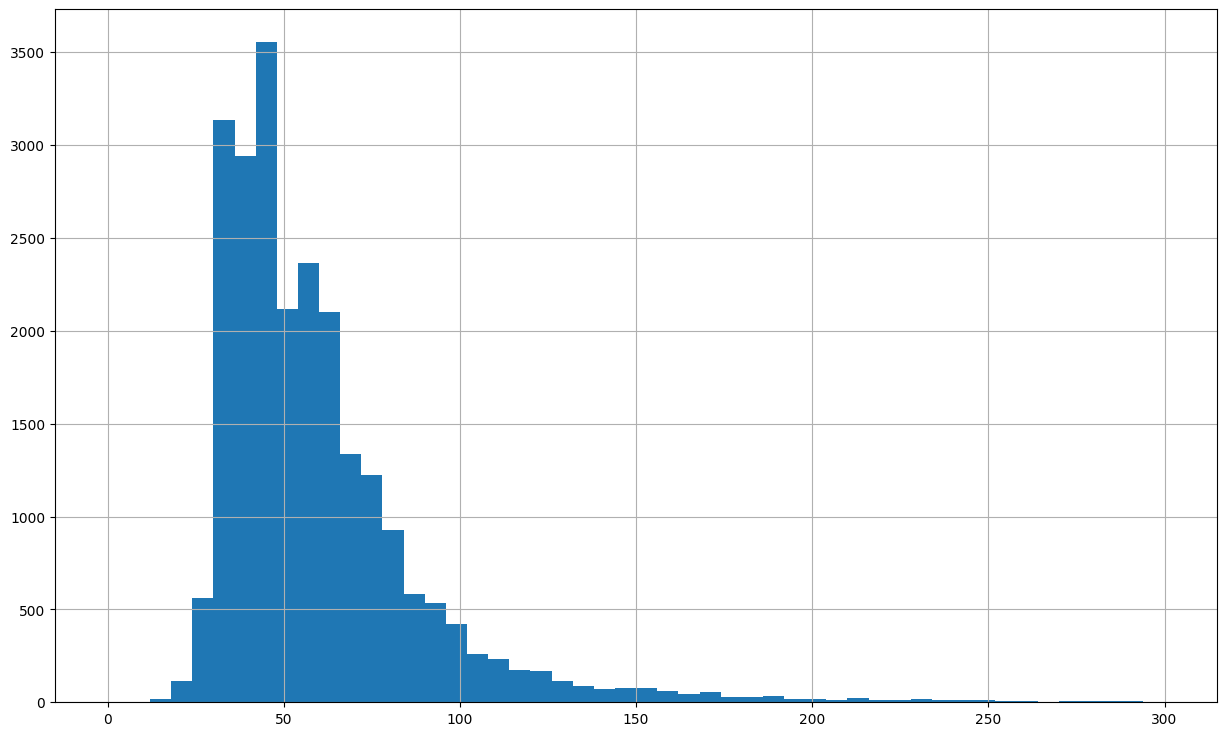

In [106]:
df['total_area'].hist(bins=50, range=(0, 300), figsize=(15, 9));

##### Жилая площадь
На этапе предобработки мы заполнини пропуски в этом столбце примерными значениями. Видим, что больше всего объявлений в диапазоне от 20 до 35 метров.

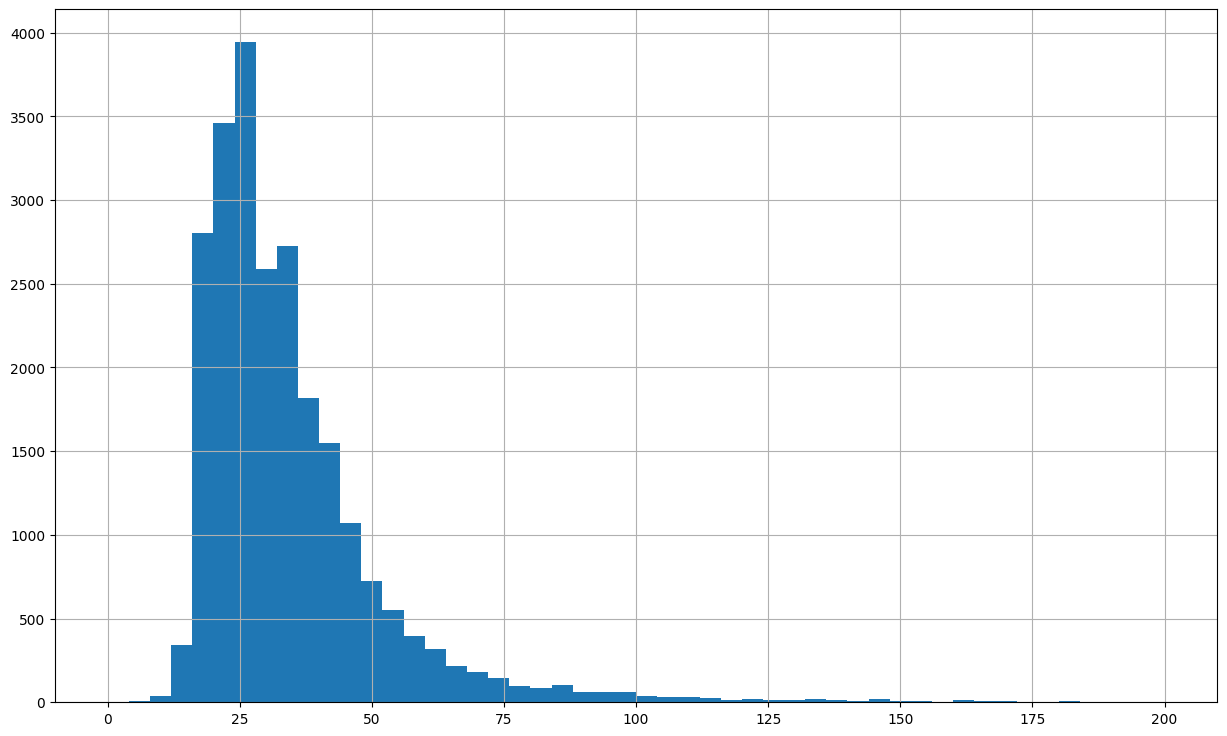

In [107]:
df['living_area'].hist(bins=50, range=(0, 200), figsize=(15, 9));

##### Площадь кухни

Данных по площадям кухонь мало, но можно видеть, что в большей части объявлений площадь кухни менее 10 квадратных метров.

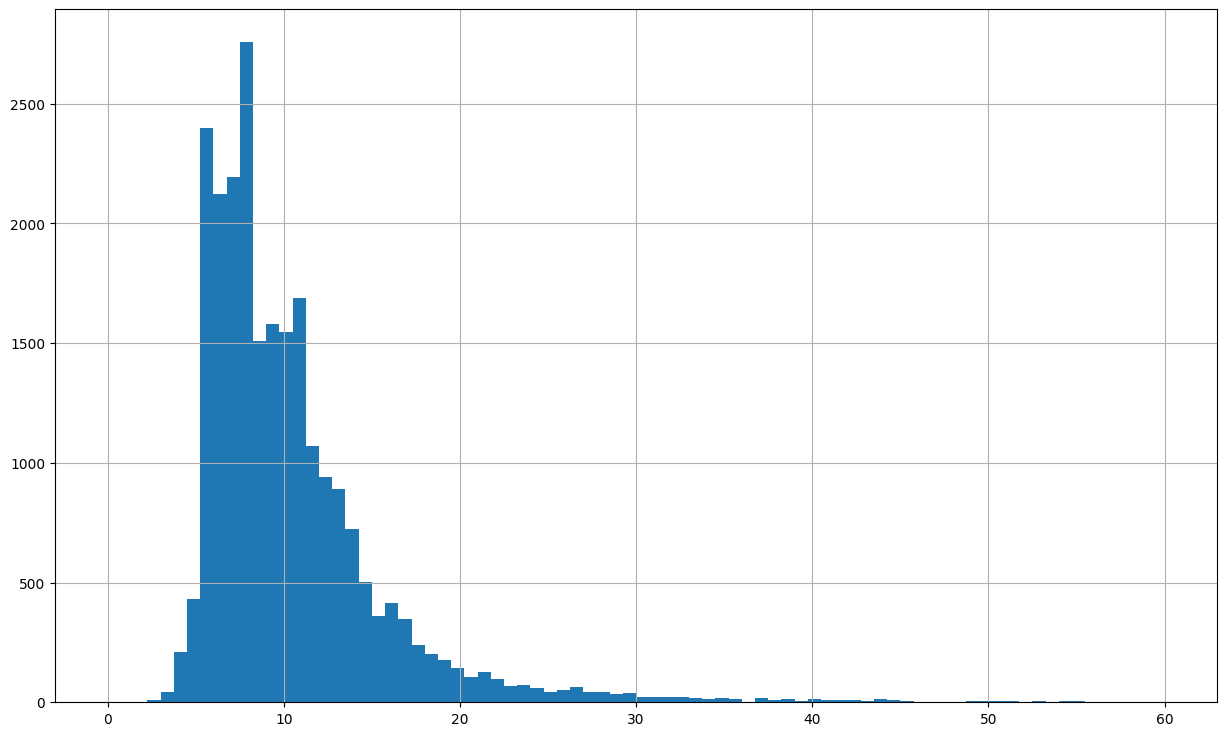

In [108]:
df['kitchen_area'].hist(bins=80, range=(0, 60), figsize=(15, 9));

##### Цена объекта

Большая часть квартир сосредоточена в ценовом диапазоне до 10 миллионов рублей. Видны небольшие доли элитного жилья, с ценой более 40 миллионов.

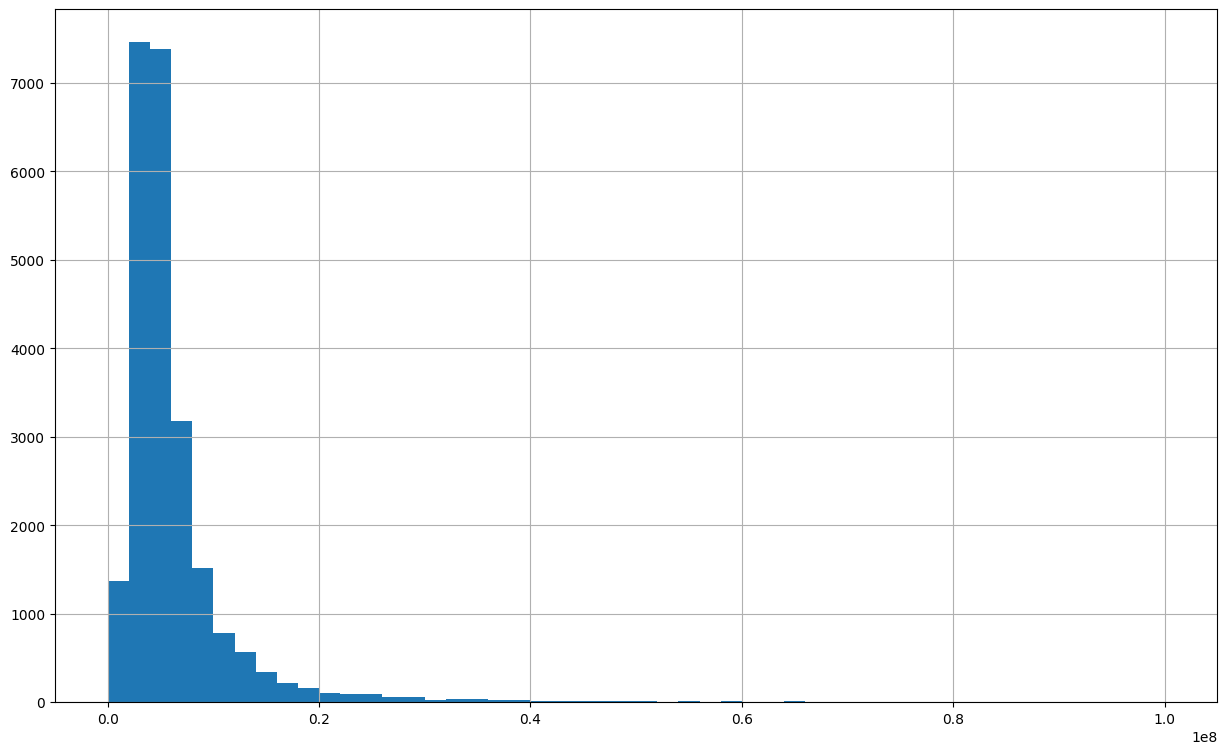

In [109]:
df['last_price'].hist(bins=50, range=(0, 100000000), figsize=(15, 9))
df['last_price'].describe();

##### Количество комнат
Видим, что основную долю составляют 1-3 комнатные квартиры, число квартир с большим количеством комнат значительно меньше.

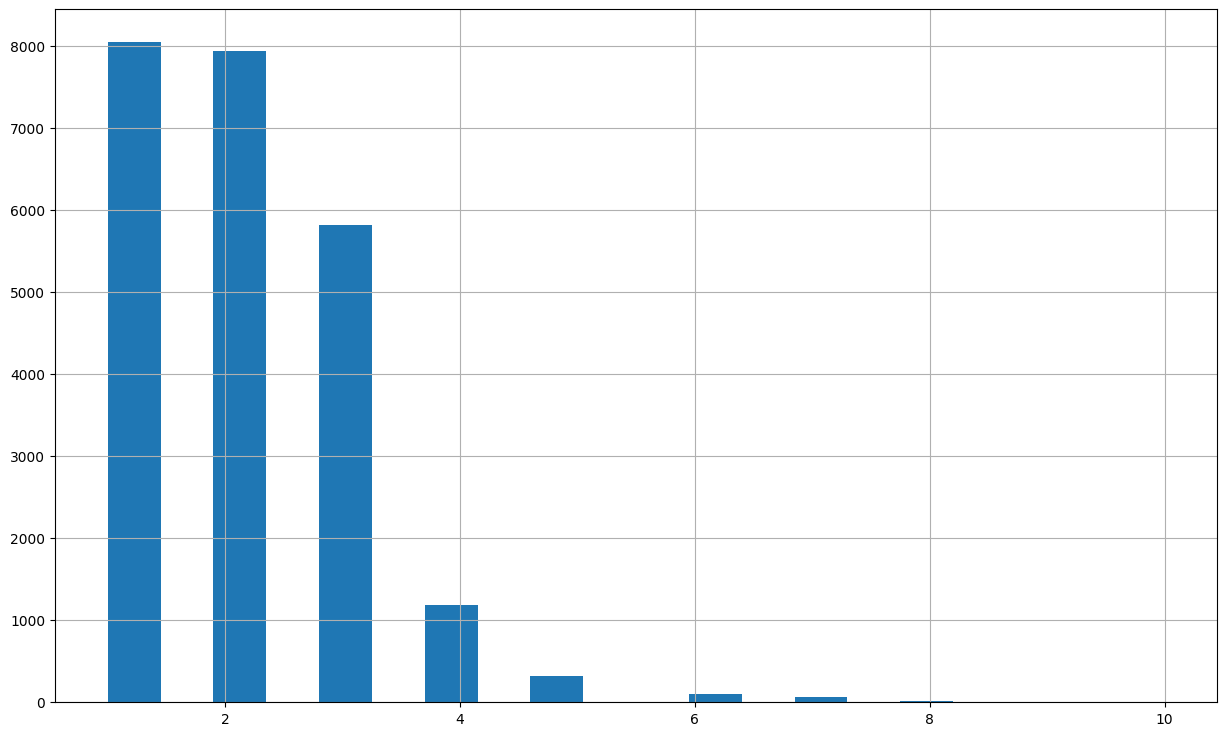

In [110]:
df['rooms'].hist(bins=20, range=(1,10), figsize=(15, 9));

##### Высота потолков

В большинестве квартир стандартная высота потолков от 2.5 до 2.7 метров.

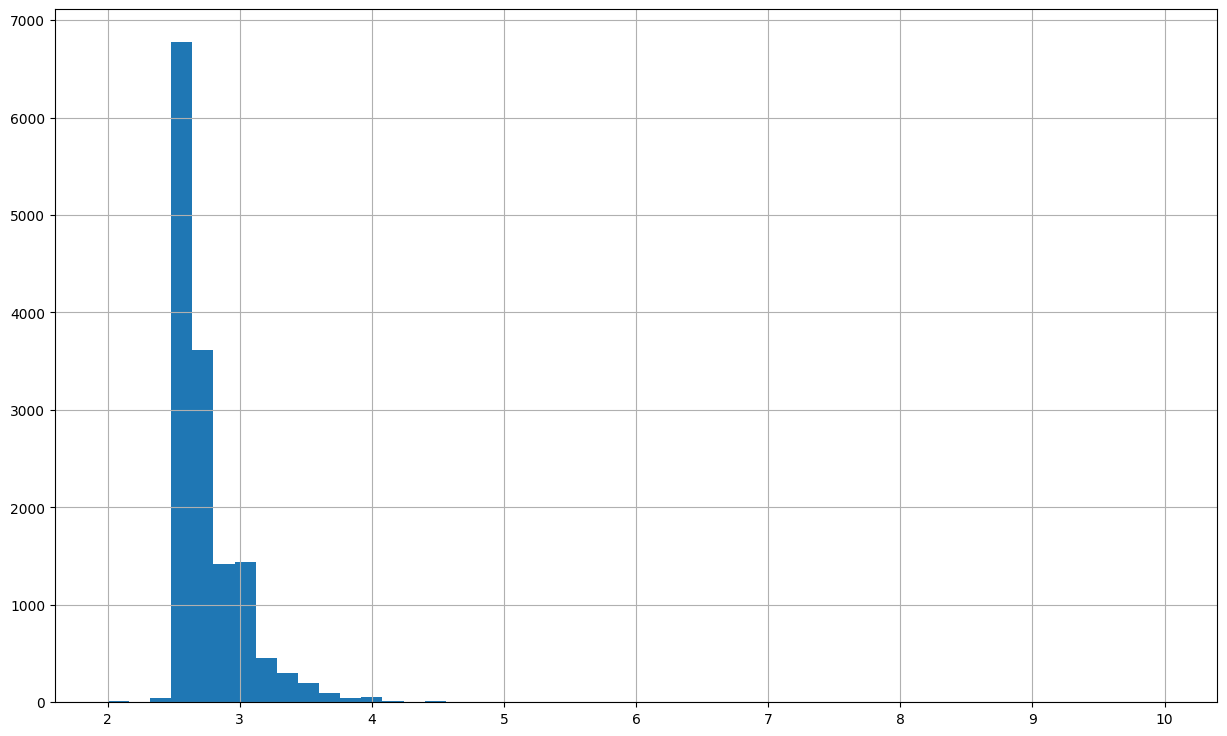

In [111]:
df['ceiling_height'].hist(bins=50, range=(2,10), figsize=(15, 9));

##### Этаж квартиры

Большинство квартир располагаются на первых пяти этажах, чем выше этаж, тем меньше объявлений мы видим.

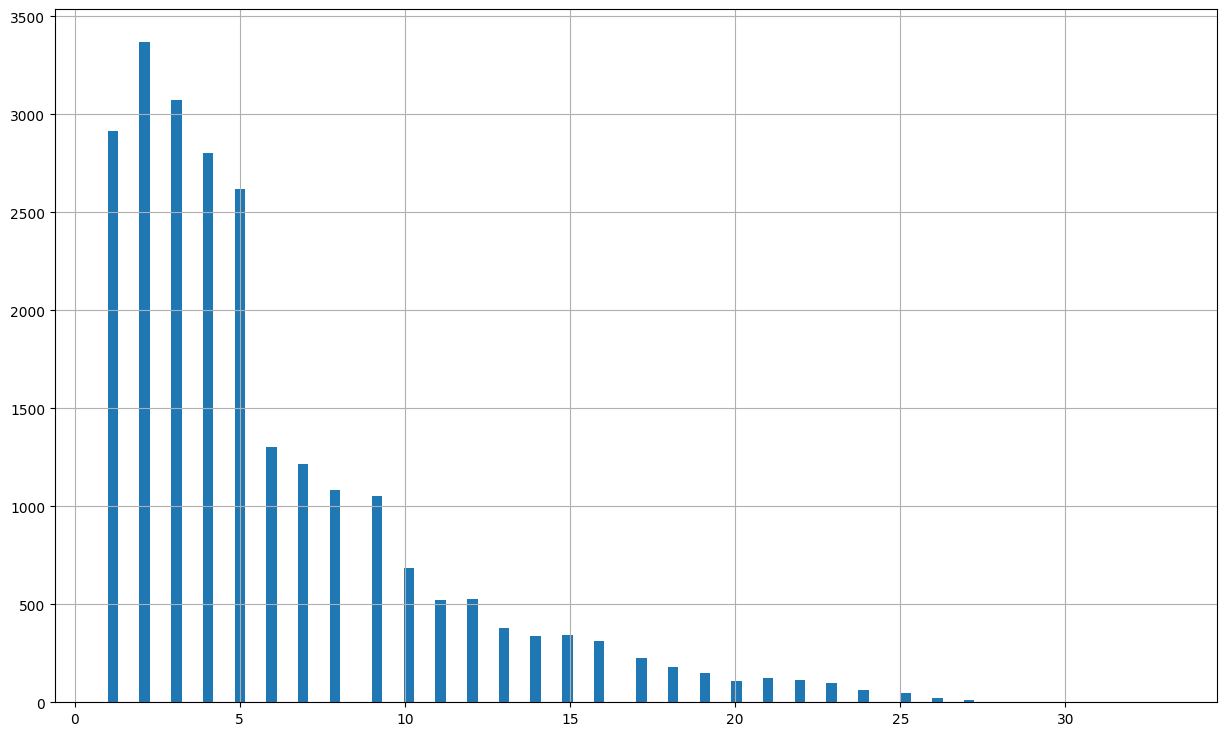

In [112]:
df['floor'].hist(bins=100, figsize=(15, 9));

##### Тип этажа квартиры

Большинство квартир расположены не на первом и не на последнем этаже.

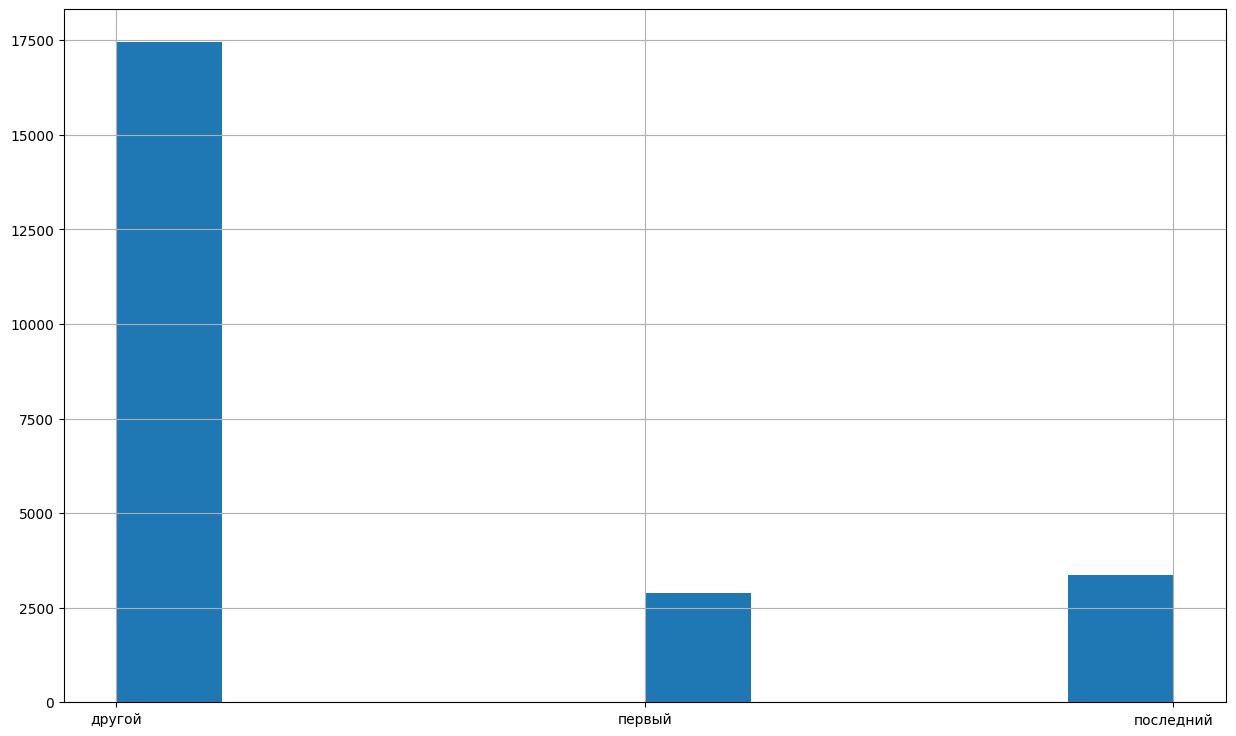

In [113]:
df['floor_type'].hist(figsize=(15, 9));

##### Общее количество этажей в доме
Лидируют пяти- и девятиэтажки - самы распространенный тип застройки.

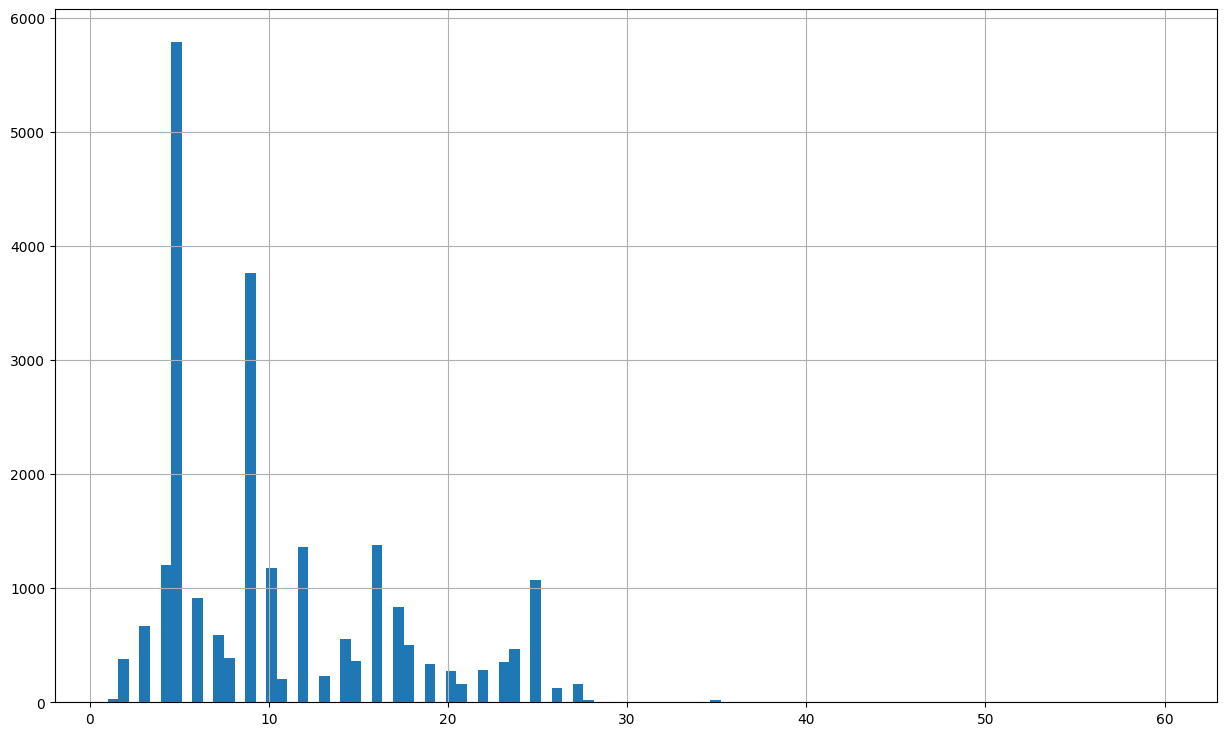

In [114]:
df['floors_total'].hist(bins=100, figsize=(15, 9));

##### Расстояние до центра города

В это столбце было много пропусков, часть из которых мы заполнили средним значением по населенному пункту. Видим, что основная масса жилья располагается в пределах от 10 до 17 км от центра.

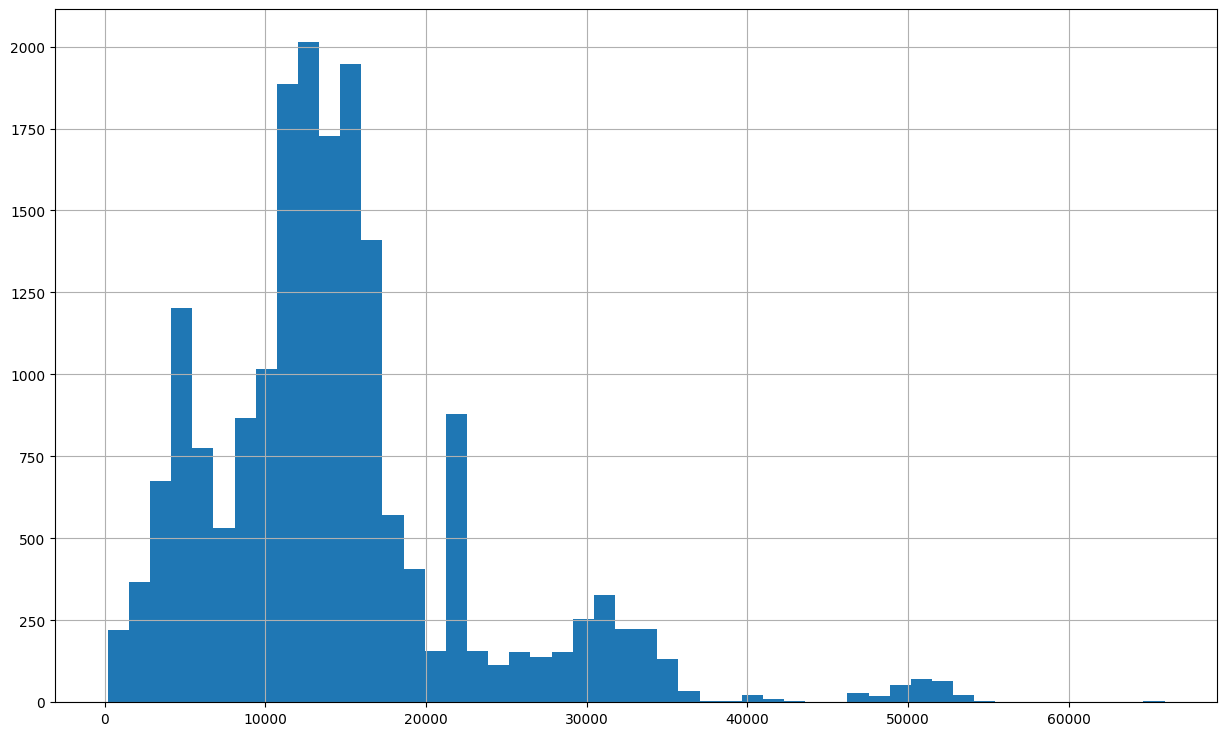

In [115]:
df['city_centers_nearest'].hist(bins=50, figsize=(15, 9));

##### Расстояние до ближайшего парка

У большей части объявлений эта информация не указана. У тех, где это отмечено, больше всего объявлений с расстояниями от 400 до 600 метров.

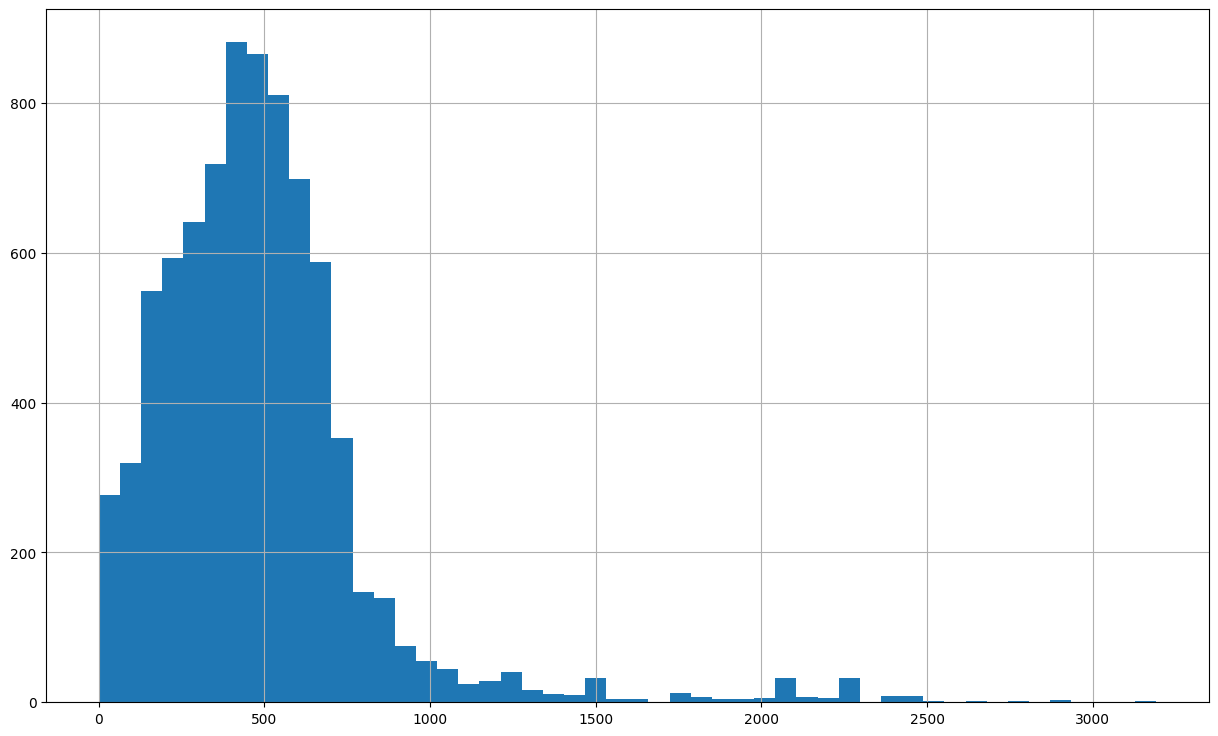

In [116]:
df['parks_nearest'].hist(bins=50, figsize=(15, 9));

##### Расстояние до ближайшего аэропорта

Видим так же много пропущенных значений. В основном жилье находится на удалении от 10 до 30 тысяч метров от аэропортов.

(23698, 28)

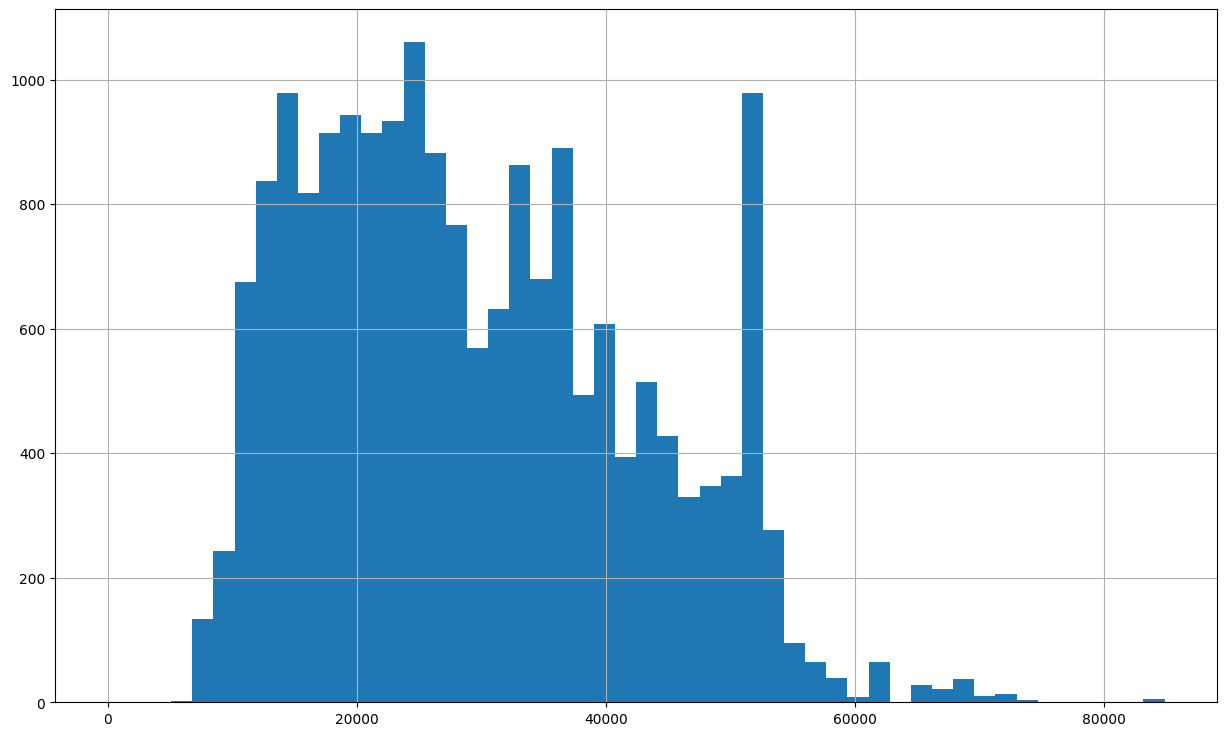

In [117]:
df['airports_nearest'].hist(bins=50, figsize=(15, 9))
df.shape

Видим выброс в диапазоне 50-60 тыс метров.

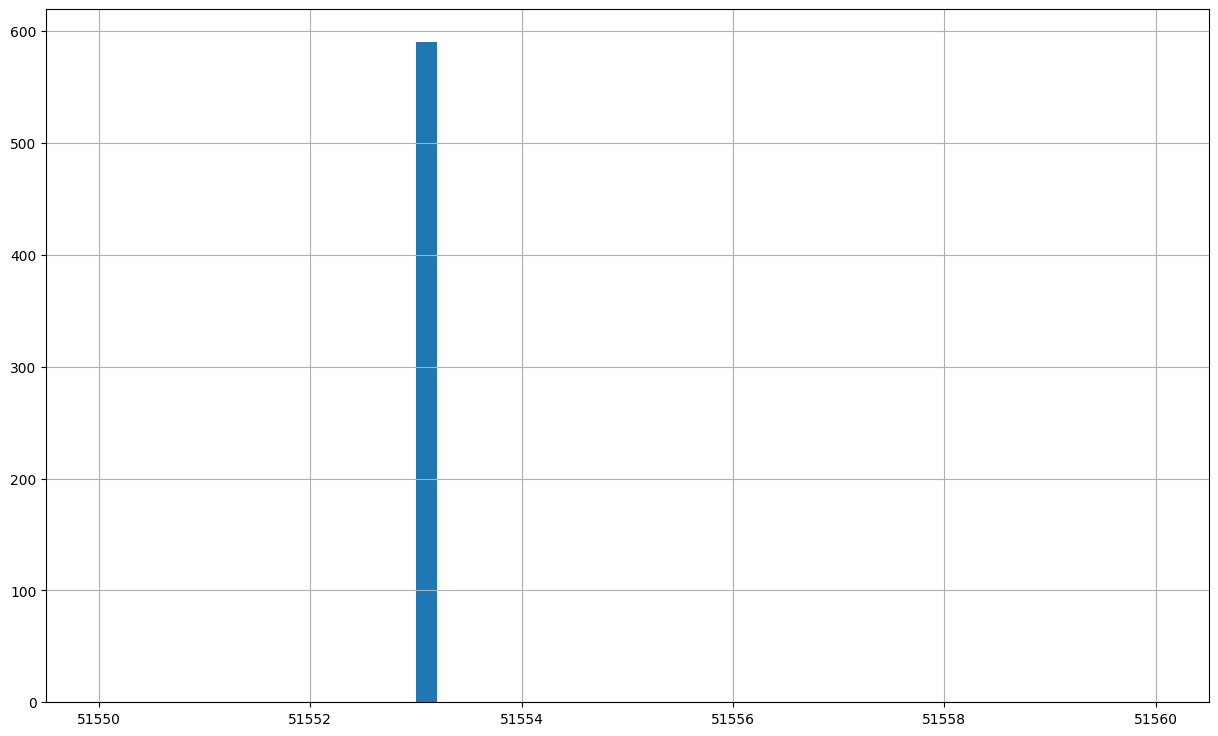

In [118]:
df['airports_nearest'].hist(bins=50, range=(51550, 51560),figsize=(15, 9));

Удалим выбросы.

(18279, 28)

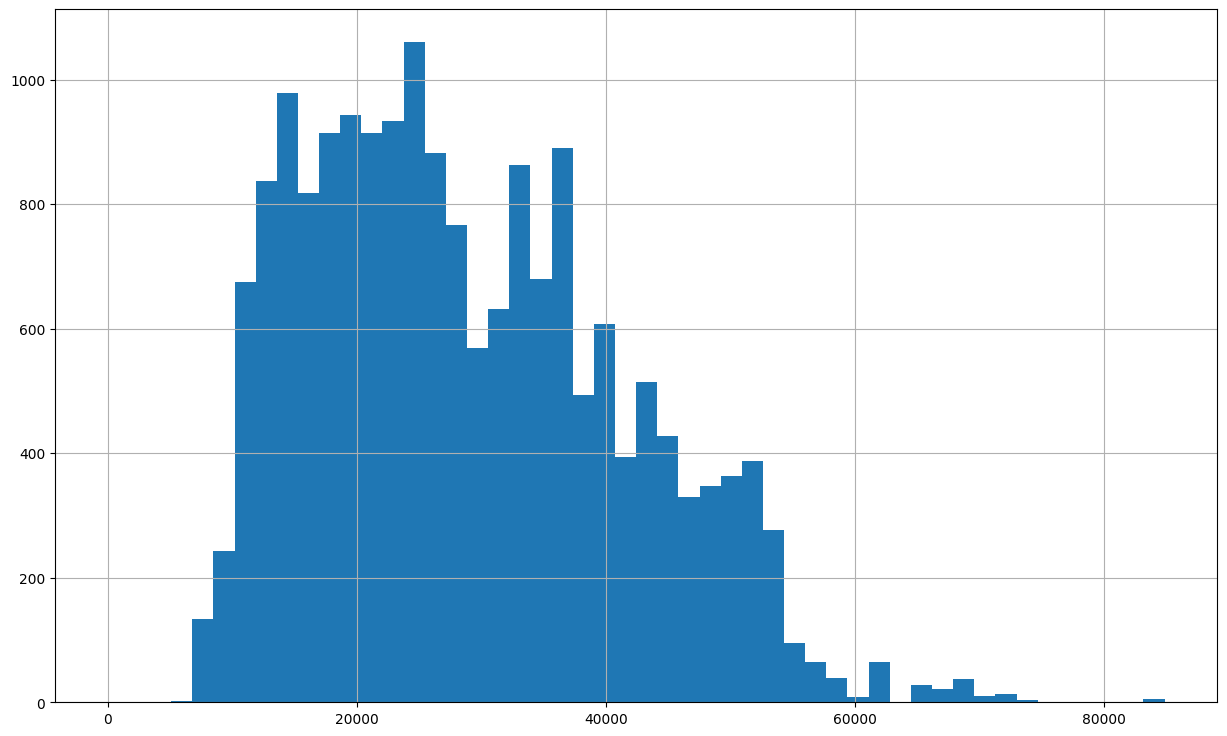

In [119]:
df = df[(df['airports_nearest'] < 51552) | (df['airports_nearest'] > 51554)]
df['airports_nearest'].hist(bins=50,figsize=(15, 9))
df.shape

##### День и месяц публикации объявления

Больше всего объявлений были размещены с февраля по март.

<Axes: >

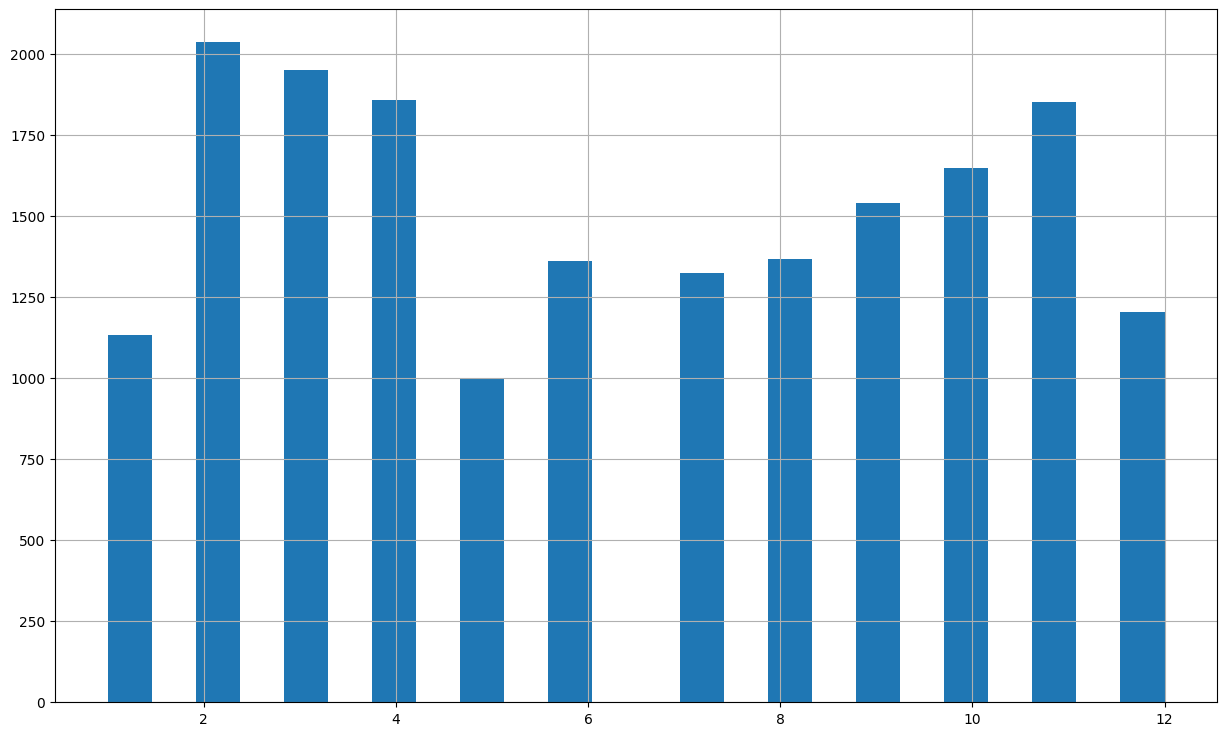

In [120]:
df['month'].hist(bins=24, figsize=(15, 9))

Большая часть объявлений размещены в будние дни.

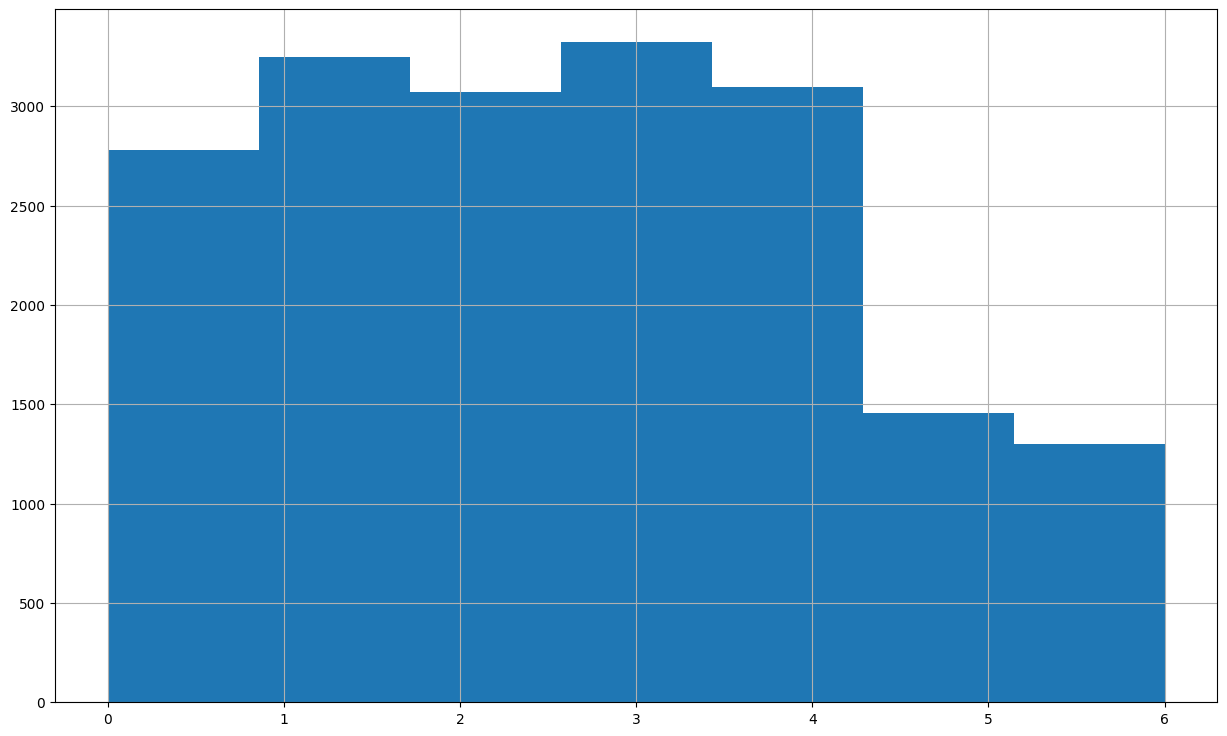

In [121]:
df['day_of_week'].hist(bins=7, figsize=(15, 9));

#### Изучим столбец со сроками размещения объявлений

Медиана составляет 95 дней, столько времени требуется в среднем, чтобы продать квартиру. Быстрыми можно считать продажи, которые находятся раньше первого квартиля (45 дней). Долгие - те, что выбиваются за третий квартиль (232 дня).


count    15923.000000
mean       182.412925
std        223.220812
min          1.000000
25%         43.000000
50%         96.000000
75%        232.000000
max       1572.000000
Name: days_exposition, dtype: float64


(18279,)

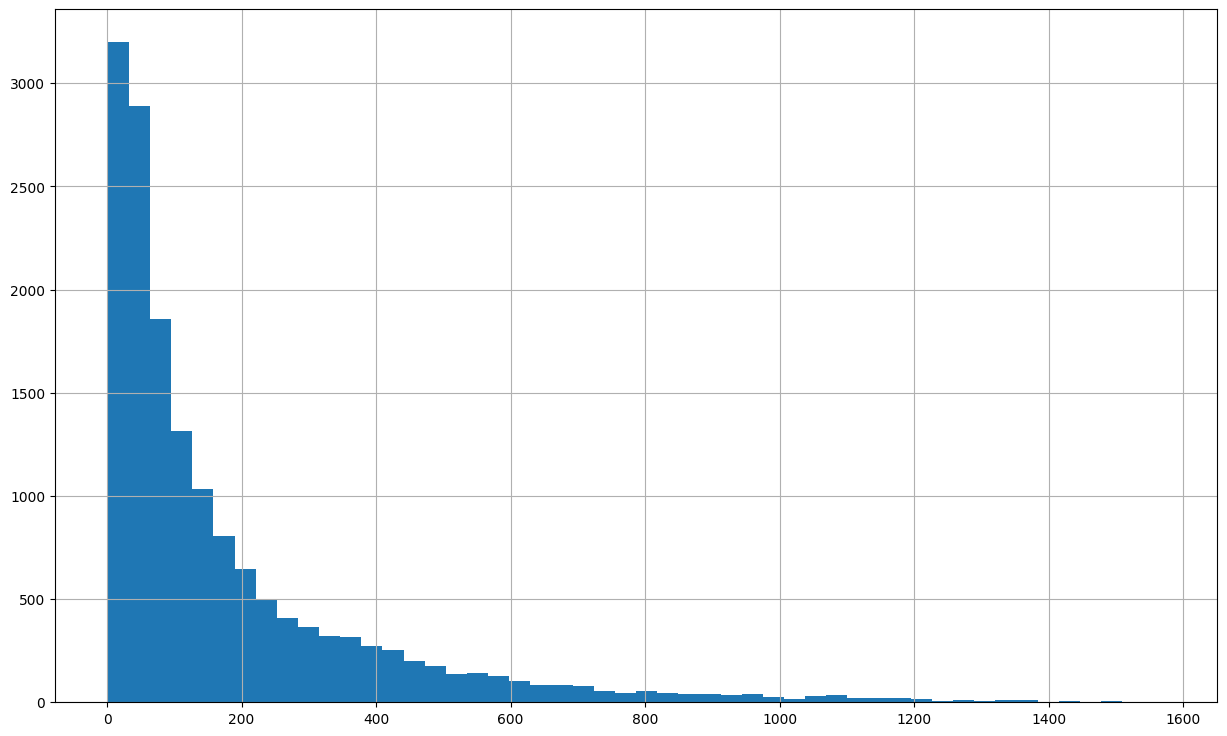

In [122]:
df['days_exposition'].hist(bins=50, figsize=(15, 9))
print(df['days_exposition'].describe())
df['days_exposition'].shape

Рассмотрим отрезок 0-100 дней более подробно.

<Axes: >

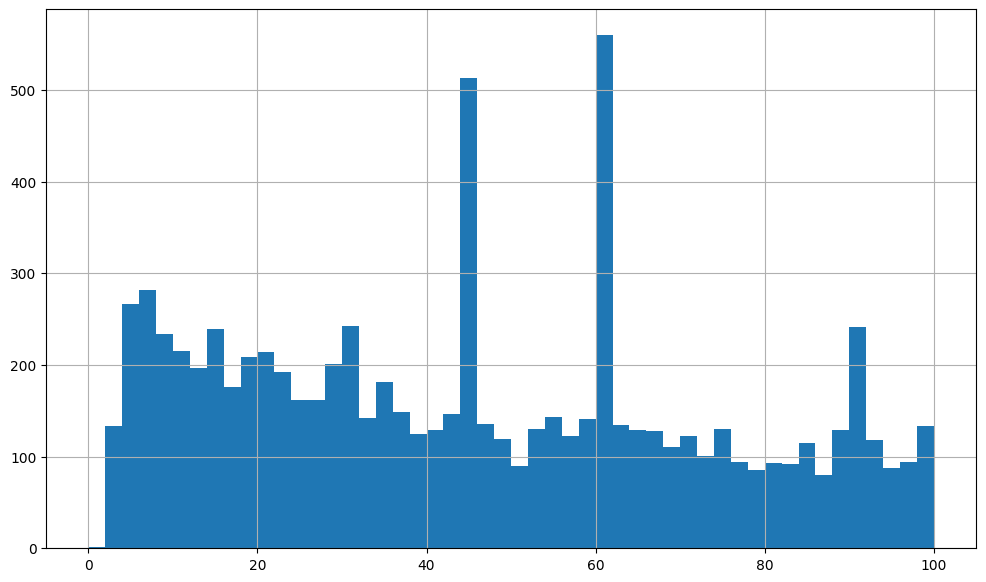

In [123]:
df['days_exposition'].hist(bins=50, range=(0,100), figsize=(12, 7))

Удалим аномальные пики на 45 и 60 днях.

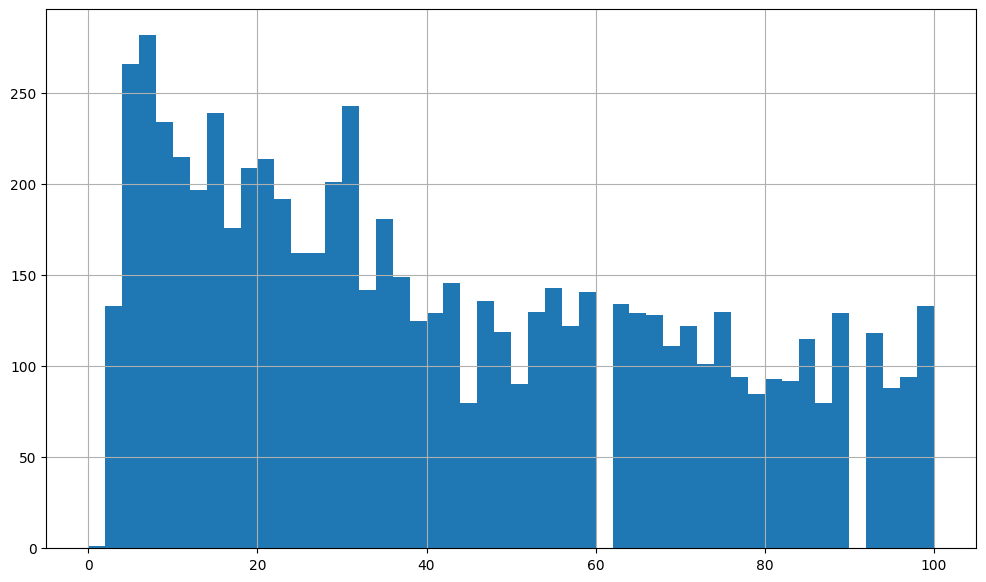

In [124]:
df = df[(df['days_exposition'] < 45) | (df['days_exposition'] > 46)]
df = df[(df['days_exposition'] < 60) | (df['days_exposition'] > 61)]
df = df[(df['days_exposition'] < 90) | (df['days_exposition'] > 91)]
df['days_exposition'].hist(bins=50, range=(0,100), figsize=(12, 7));

### Какие факторы больше всего влияют на полную стоимость объекта?

##### Общая площадь

Построим диаграмму рассеяния по столбцам цены и площади, чтобы установить взаимосвязь.
Посчитаем коэффициент Пирсона, чтобы увидеть корреляцию.

Зависимость определенно есть, особенно на площадях до 200 метров. Дальше уже недостаточно данных, чтобы сделать однозначные выводы.


0.6458642920876267


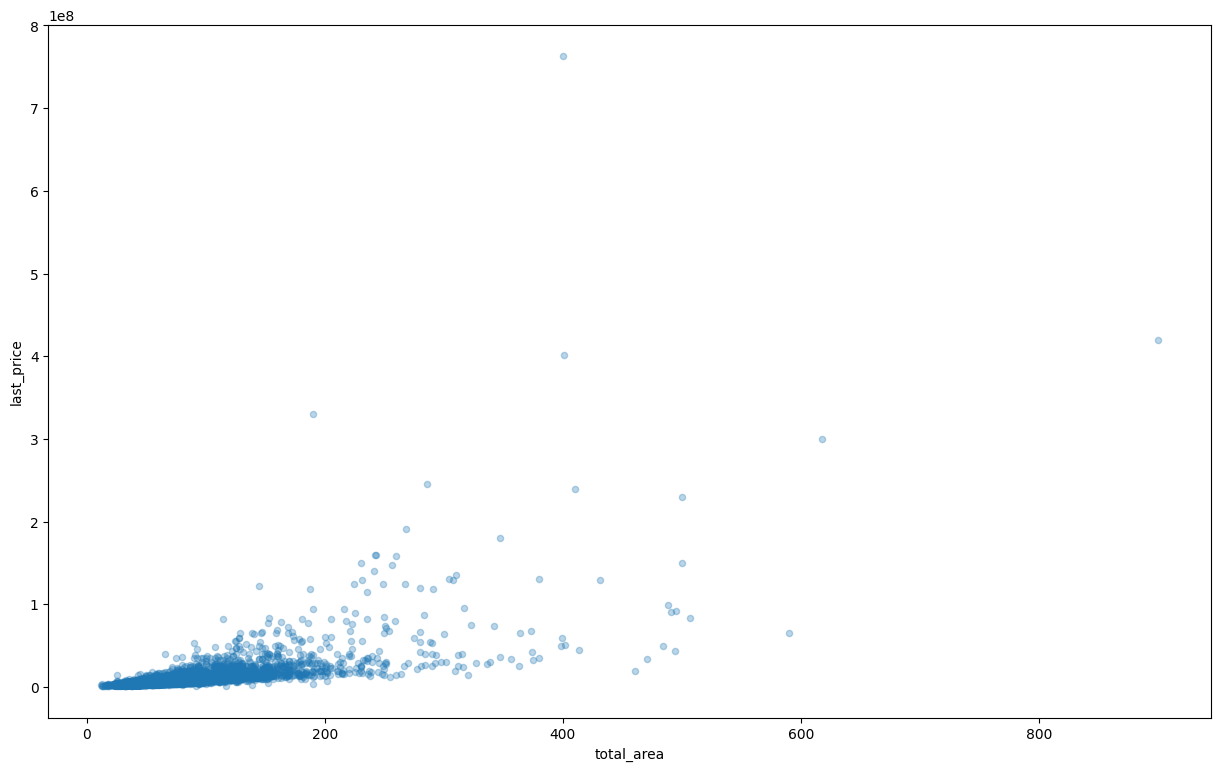

In [125]:
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, figsize=(15,9)) 
print(df['last_price'].corr(df['total_area']));

##### Жилая площадь

Построим диаграмму рассеяния по столбцам цены и площади, чтобы установить взаимосвязь. Посчитаем коэффициент Пирсона, чтобы увидеть корреляцию. Видим, что зависимость присутствует на площадях до 130 м.

0.6458642919591696


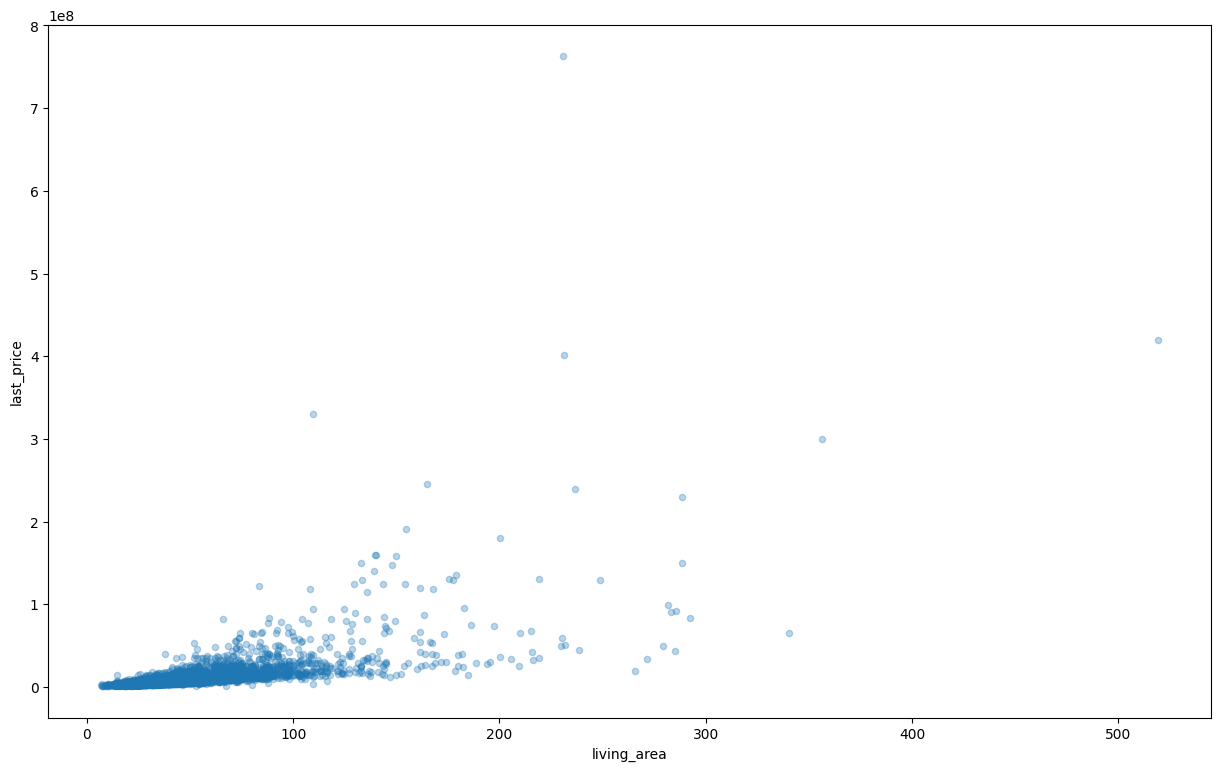

In [126]:
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3, figsize=(15,9)) 
print(df['last_price'].corr(df['living_area']));

##### Площадь кухни

Выполним аналогичные действия, чтобы проследить зависимость цены жилья от площади кухни.
Аналогично с жилой площадью - зависимость есть - чем больше, тем дороже.

0.6458642915515612


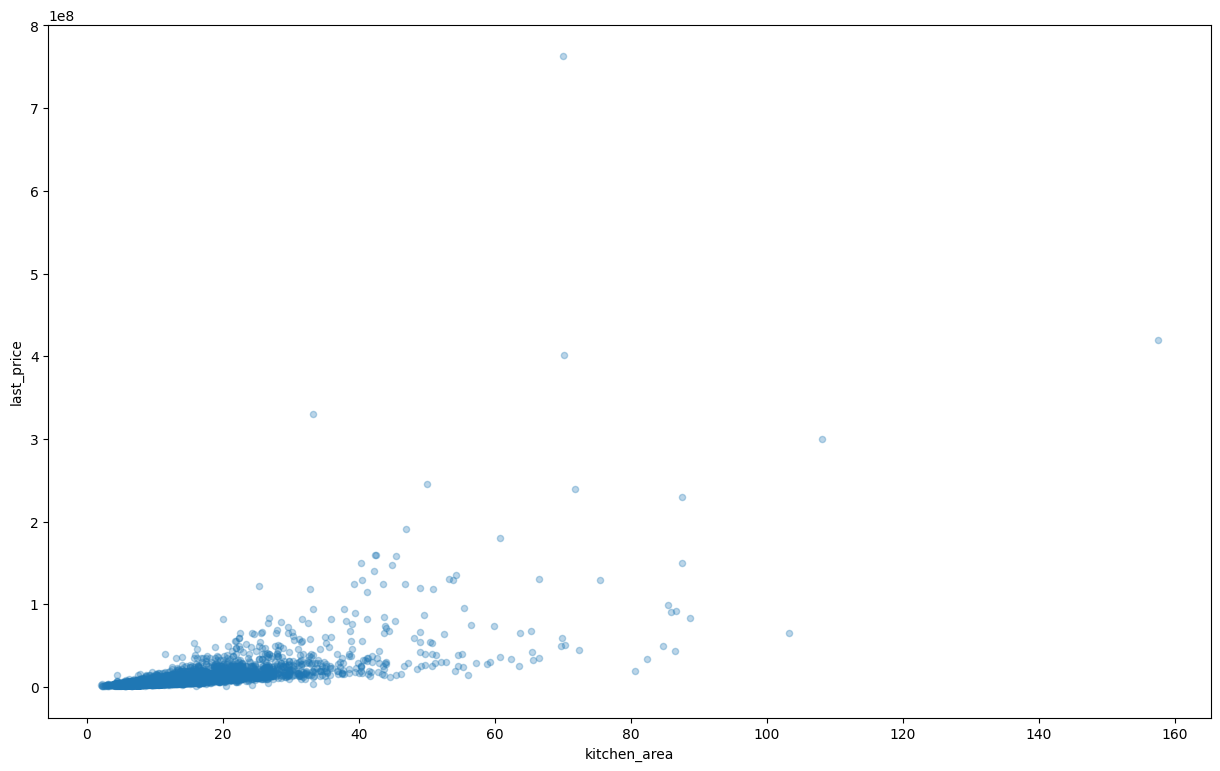

In [127]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, figsize=(15,9)) 
print(df['last_price'].corr(df['kitchen_area']));

##### Количество комнат

Используем regplot из библиотеки seaborn, чтобы увидеть линию регрессии. Видим, что с ростом числа комнат, цена увеличивается незначительно.

0.36337317334529634


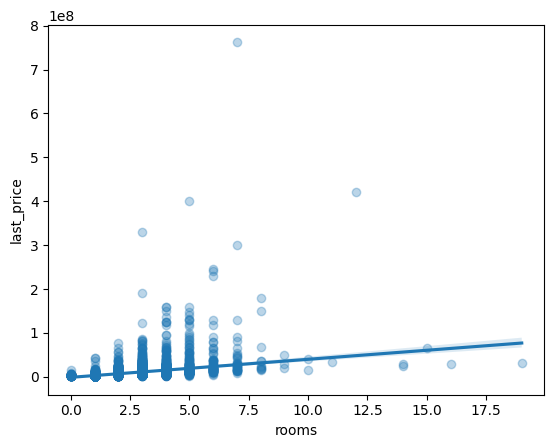

In [128]:
sb.regplot(x=df['rooms'], y=df['last_price'], scatter_kws={'alpha':0.3})
print(df['last_price'].corr(df['rooms']));

##### Тип этажа

Используем круговую диаграмму. Видим, что 3/4 квартир располагаются не на первом и не на последнем этажах. Это говорит о том, что покупатели стараются выбирать себе жилье где-то посередине.

<Axes: ylabel='last_price'>

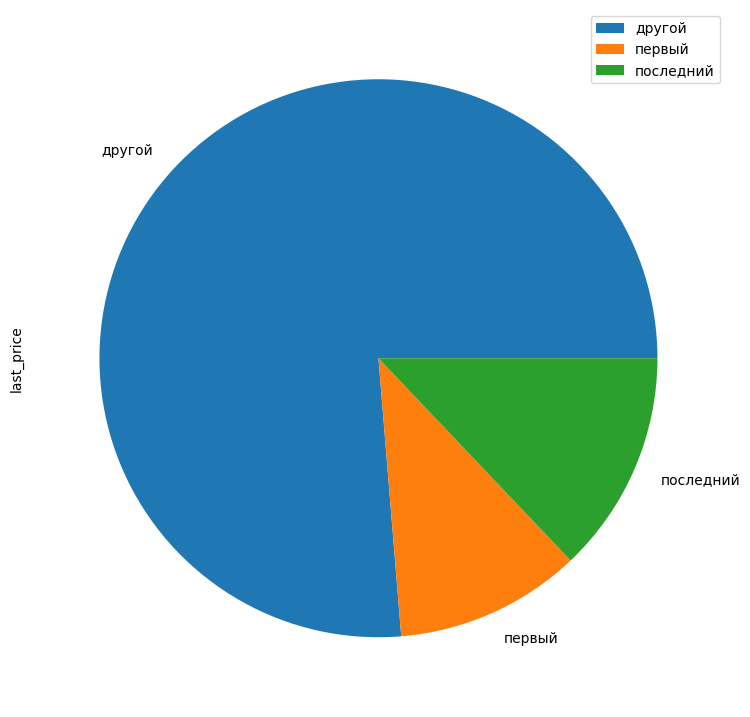

In [131]:
df.groupby(['floor_type']).count().plot(kind='pie', y='last_price', figsize=(9,15));

##### День недели

Используем линейный график. В целом, цена не зависит от дня размещения, но в выходные дни немного выше, чем в будни.

0.005518776407071986


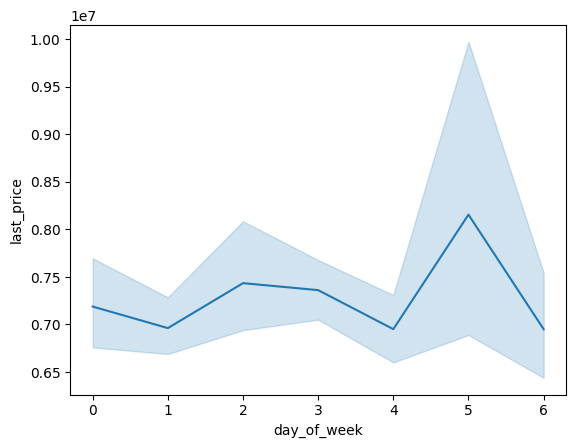

In [132]:
sb.lineplot(x=df["day_of_week"], y=df["last_price"])
print(df['last_price'].corr(df['day_of_week']))

##### Месяц

Видны пики и просадки от сезона к сезону. Самые дешевые квартиры были размещены в ноябре, самые дорогие - в новогодние праздники. Несмотря на маленькую корреляцию, по графику можно проследить зависимость цены от месяца размещения.

0.0009338197995445803


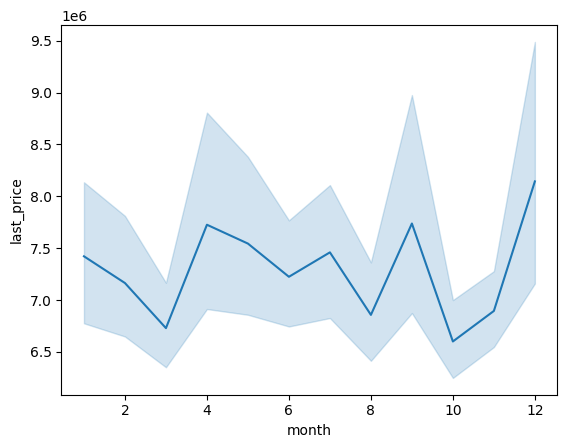

In [133]:
sb.lineplot(x=df["month"], y=df["last_price"])
print(df['last_price'].corr(df['month']))

##### Год

Видим, что чем новее объявления, тем они дешевле. Это может быть связано с различными кризисами на рынке недвижимости. Видно, что после 2018 года намечается рост цен.

-0.06375016908316733


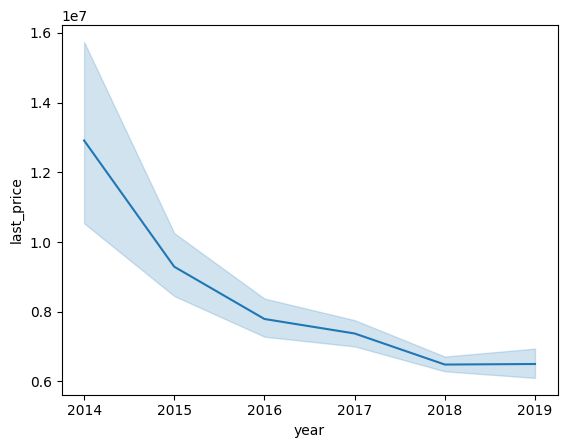

In [134]:
sb.lineplot(x=df["year"], y=df["last_price"])
print(df['last_price'].corr(df['year']))

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

Большинство квартир продаются в Петербурге и ближайших пригородах.

In [135]:
df_grouped = df.pivot_table(index='locality_name', values='sqm_price', aggfunc=['count', 'mean', 'min','max'])
df_grouped = df_grouped.sort_values(by=[('count', 'sqm_price')], ascending=False).head(10)
display(df_grouped)

,count,mean,min,max
,sqm_price,sqm_price,sqm_price,sqm_price
locality_name,,,,
Санкт-Петербург,12607,112311.761402,15345.0,1907500.0
Шушары,372,78178.204301,47833.0,147826.0
Пушкин,290,102369.462069,59836.0,256522.0
Колпино,276,75128.742754,47957.0,125000.0
Парголово,263,89826.357414,39206.0,138522.0
Петергоф,163,83372.331288,51613.0,135970.0
Красное Село,150,71899.820000,42500.0,101613.0
Сестрорецк,146,100503.000000,50435.0,182688.0


Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Самая большая стоимость, ожидаемо, в Петербурге и, внезапно, во Всеволожске. Самая низкая - в Гатчине, Петербурге и Выборге.

In [136]:
display(df_grouped.sort_values(by=[('max', 'sqm_price')], ascending=False).head(10))

display(df_grouped.sort_values(by=[('min', 'sqm_price')], ascending=True).head(10))


,count,mean,min,max
,sqm_price,sqm_price,sqm_price,sqm_price
locality_name,,,,
Санкт-Петербург,12607,112311.761402,15345.0,1907500.0
Пушкин,290,102369.462069,59836.0,256522.0
Сестрорецк,146,100503.000000,50435.0,182688.0
Шушары,372,78178.204301,47833.0,147826.0
Парголово,263,89826.357414,39206.0,138522.0
Петергоф,163,83372.331288,51613.0,135970.0
Колпино,276,75128.742754,47957.0,125000.0
Кронштадт,79,78296.658228,46642.0,111471.0


,count,mean,min,max
,sqm_price,sqm_price,sqm_price,sqm_price
locality_name,,,,
Санкт-Петербург,12607,112311.761402,15345.0,1907500.0
Парголово,263,89826.357414,39206.0,138522.0
Красное Село,150,71899.820000,42500.0,101613.0
Кронштадт,79,78296.658228,46642.0,111471.0
Шушары,372,78178.204301,47833.0,147826.0
Колпино,276,75128.742754,47957.0,125000.0
Сестрорецк,146,100503.000000,50435.0,182688.0
Ломоносов,106,71430.216981,51120.0,100000.0


### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

Видим прямую зависимость между средней стоимостью и расстоянием до центра. Чем дальше - тем дешевле.

In [137]:
pd.options.display.float_format ='{:,.0f}'.format
df_spb = df.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_center_km', values='last_price', aggfunc=['mean'])
# сбросим индексы и переименуем столбцы чтобы в дальнейшем построить график
df_spb.reset_index(inplace=True) 
df_spb.columns = ['city_center_km', 'mean_price']
display(df_spb)


,city_center_km,mean_price
0,0,"31,621,257"
1,1,"19,191,594"
2,2,"17,801,784"
3,3,"10,364,660"
4,4,"13,385,709"
5,5,"13,926,267"
6,6,"14,883,962"
7,7,"13,920,283"
8,8,"9,579,105"
9,9,"6,619,593"


Посмотрим, как расстояние до центра города влияет на стоимость.
Видим довольно большую корреляцию, значит расстояние сильно влияет на цену. Это неудивительно, все хотят жить в центре, особенно в столице.

-0.7490608128876532


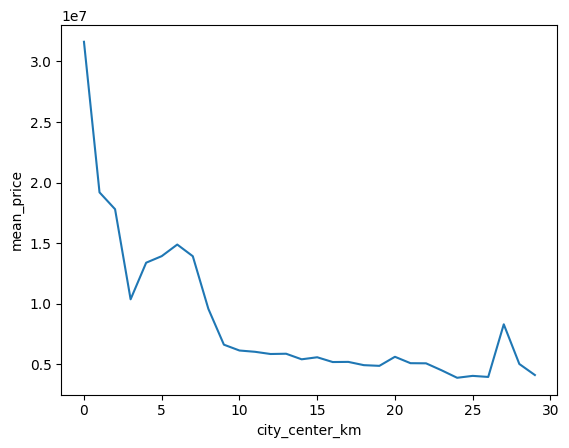

In [138]:
sb.lineplot(x=df_spb['city_center_km'], y=df_spb["mean_price"])
print(df_spb['city_center_km'].corr(df_spb['mean_price']))

## Общий вывод

### Предобработка данных
Мы заполнили некоторую часть пропусков нулями, предположив, что это будет обозначать отсутствие данных объектов (балконов, является ли жилье апартаментами).

Заполнили пропуски в living_area и kitchen_area примерными значениями.

Обработали столбец locality_name, оставив только названия населенных пунктов.

Часть пропусков пришлось оставить, т.к. логически заполнить их ничем не получилось, а замена на 0 привела бы к выбросам в данных.
### Новые данные
Рассчитали и добавили новые столбцы с обозначением цены за квадратный метр, днём/месяцем/годом публикации, а так же типом этажа и расстоянием до города в километрах.
### Исследовательский анализ
Подтвердились гипотезы о связях различных площадей и цен. На определенных диапазонах прослеживается прямая зависимость - чем больше общая/жилая площадь или площадь кухни, тем больше и цена.

Мы выявили закономерности в распределении цен, в зависимости от дня, месяца и года размещения. Самый большой перепад цен наблюдается с ноября по декабрь (в ноябре дешевле, в декабре - дороже).

Проанализировали топ 10 населенных пунктов по колиечеству объявлений и сравнили минимальну и максимальную стоимости. Самый большой разброс цен за квадратный метр в Петербурге, а самый маленький - в Выборге.

Основным ценообразующим фактором является удаленность от центра города, это подтверждается таблицей со средней стоимостью жилья относительно километров до центра. График и коэффициент корреляции это наглядно демонстрируют.